Created: 15/10/2020 by Ryan Corbyn

Modified: Date    Author

This is a really simple program for manually plotting the data from a thermometry experiment. 
The user creates arrays with the temperature and the resonant frequency  and error data in them. 
The data is then plotted onto a graph, and from this, the gradient is extracted. The user can then save this information if they wish. 

In [25]:
import numpy as np 
import matplotlib.pyplot as plot 
import scipy.optimize as opt

In [1]:
def linear_graph(x, m, c):
    # creates a linear fit
    y = m*x + c
    return(y)

In [29]:
def get_linear_fit_data(Temp, central_resonant_freq):
    # A method to perform the linear fit to the data. 
    P0 = [1,1]
    coeffs, confidence = opt.curve_fit(linear_graph, Temp, central_resonant_freq, P0)
    error = np.sqrt(np.diag(confidence))
    
    return(coeffs, error)
    

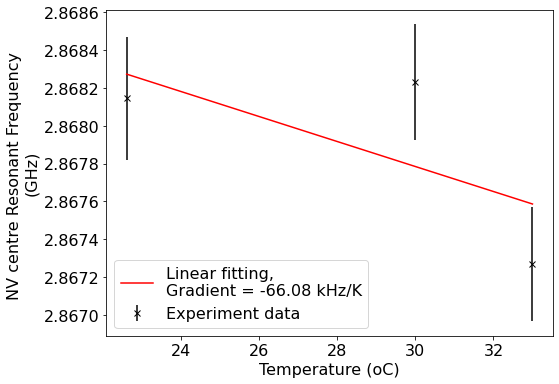

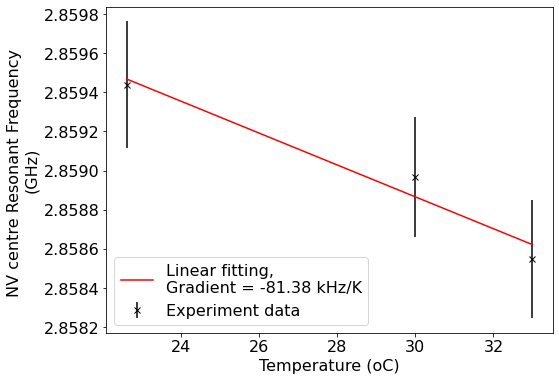

In [51]:
Temp = np.array([22.6, 30.0, 33.0])

diamond1_res_freqs = np.array([[2.8091583001623, 2.81033978401735, 2.80930968665641],
                               [2.92713149375004, 2.92611892704742, 2.92522894939002]])
    
error_diamond_1 = np.array([[0.000323435, 0.00030674, 0.000302379],
                           [0.000274514, 0.000323691, 0.000281848]])

diamond2_res_freq = np.array([[2.81484480527477, 2.81293002726958, 2.81235971445306],
                             [2.90403283089281, 2.90500535575188, 2.90473911193972]])
error_diamond_2 = np.array([[0.000298996172323415, 0.0003999576771152, 0.000295238220491532],
                           [0.00025591273924141, 0.000298493334421609, 0.00036673750911]])


diamond_1_mean_freq= np.mean(diamond1_res_freqs, axis=0)
diamond_2_mean_freq = np.mean(diamond2_res_freq, axis=0)

plot.rcParams.update({'font.size' : 16})
plot.rcParams.update({'figure.figsize' :[8, 6]})


fig, ax1 = plot.subplots()
ax1 = plot.errorbar(Temp,diamond_1_mean_freq, error_diamond_1[0], marker = 'x', 
             color = 'k', linestyle = '', label='Experiment data')

linear_fit_params, errors = get_linear_fit_data(Temp, diamond_1_mean_freq)
y = linear_graph(Temp, linear_fit_params[0], linear_fit_params[1])

ax1 = plot.plot(Temp, y, color = 'r', label = 'Linear fitting,\nGradient = ' + 
                str(round(linear_fit_params[0]*10**6,2)) + ' kHz/K')
plot.xlabel('Temperature (oC)')
plot.ylabel('NV centre Resonant Frequency \n(GHz)')
plot.legend(loc='lower left')

fig2, ax2 = plot.subplots()
ax2 = plot.errorbar(Temp,diamond_2_mean_freq, error_diamond_1[0], marker = 'x', 
             color = 'k', linestyle = '', label='Experiment data')

linear_fit_params2, errors2 = get_linear_fit_data(Temp, diamond_2_mean_freq)
y = linear_graph(Temp, linear_fit_params2[0], linear_fit_params2[1])

ax2 = plot.plot(Temp, y, color = 'r', label = 'Linear fitting,\nGradient = ' + 
                str(round(linear_fit_params2[0]*10**6,2)) + ' kHz/K')
plot.xlabel('Temperature (oC)')
plot.ylabel('NV centre Resonant Frequency \n(GHz)')
plot.legend(loc='lower left')

In [56]:
print(linear_fit_params2[0]*10**6)
print(errors2[0]*10**6)

-81.38076002272021
16.944570215420853


In [55]:
folder_path = 'H:\\My Documents\\Strathclyde_Back_up\\Graphs_and_analysis\\ODMR\\20201009\\'
fig.savefig(folder_path + '20201009_ND1_central_freq_vs_T_plot.png')
fig.savefig(folder_path + '20201009_ND1_central_freq_vs_T_plot.pdf')
fig2.savefig(folder_path + '20201009_ND2_central_freq_vs_T_plot.png')
fig2.savefig(folder_path + '20201009_ND2_central_freq_vs_T_plot.pdf')